### Codigo usando dataset cifar-10
Conjunto de dados com 60.000 imagens divididas em 10 classes, como aviões, carros e cães, com imagens de 32x32 pixels em cores.

In [104]:
import tensorflow as tf 
import keras 
import matplotlib
import numpy as np 
from tensorflow.keras.datasets import cifar10 # importando o data set 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt 

In [43]:
# carregando o dataset
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()

In [44]:
X_treinamento.shape, X_teste.shape # 32 por 32 pixels 

((50000, 32, 32, 3), (10000, 32, 32, 3))

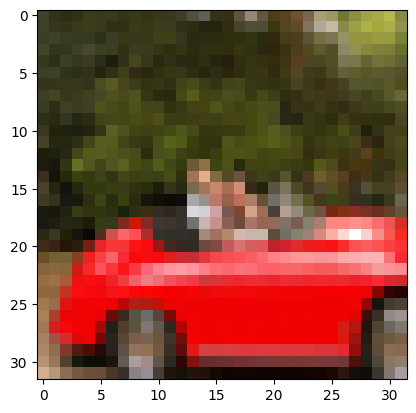

In [45]:
# visualizando uma imagem do dataset 
plt.imshow(X_treinamento[99])

In [46]:
X_treinamento = X_treinamento.astype('float32') # convertendo para float os dados de treinamento 
X_treinamento /= 255 # diminuindo a escala dos dados 

# mesmo processo para dados de teste 
X_teste = X_teste.astype('float32')
X_teste /= 255

# vendo o tamanho maximo e minimo 
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [47]:
# onehot encoder 
y_treinamento = np_utils.to_categorical(y_treinamento, num_classes = 10)
y_teste = np_utils.to_categorical(y_teste, num_classes = 10)

y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [105]:
rede = Sequential() # criando a rede neural 

rede.add(InputLayer(shape = (32, 32, 3))) # camada de entrada 

# primeiro bloco
rede.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'sigmoid')) # camada de convolução 
rede.add(BatchNormalization()) 
rede.add(MaxPooling2D(pool_size = (2, 2))) # camada de maxpooling 

# segundo bloco
rede.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'sigmoid')) # camada de convolução 
rede.add(BatchNormalization()) 
rede.add(MaxPooling2D(pool_size = (2, 2))) # camada de maxpooling 

# terceiro bloco
rede.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same' , activation = 'sigmoid')) # camada de convolução 
rede.add(BatchNormalization()) 
rede.add(MaxPooling2D(pool_size = (2, 2))) # camada de maxpooling 

rede.add(Flatten()) # camada de flatten 

rede.add(Dense(units = 256, activation = 'relu')) # primeira camada densa 
rede.add(Dropout(0.2)) # zera 20% dos 256 neuronios 
rede.add(Dense(units = 256, activation = 'relu')) # primeira camada densa 
rede.add(Dropout(0.2)) # zera 20% dos 256 neuronios 
rede.add(Dense(units = 10, activation = 'softmax'))

In [106]:
rede.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,466 (857.29 KB)

 Trainable params: 219,274 (856.54 KB)

 Non-trainable params: 192 (768.00 B)

In [107]:
# compilando a rede neural
rede.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [116]:
# trinamento da rede 
rede.fit(X_treinamento, y_treinamento, batch_size = 128,
         epochs = 10, validation_data = (X_teste, y_teste))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9251 - loss: 0.2050 - val_accuracy: 0.7060 - val_loss: 1.1365
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9292 - loss: 0.1956 - val_accuracy: 0.7329 - val_loss: 1.0825
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9334 - loss: 0.1861 - val_accuracy: 0.7180 - val_loss: 1.1042
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.9328 - loss: 0.1874 - val_accuracy: 0.7304 - val_loss: 1.1236
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.9359 - loss: 0.1852 - val_accuracy: 0.7024 - val_loss: 1.3256
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9375 - loss: 0.1795 - val_accuracy: 0.7374 - val_loss: 1.0226
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9378 - loss: 0.1726 - val_accuracy: 0.7118 - val_loss: 1.2252
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9401 - loss: 0.1676 - 

In [121]:
resultado = rede.evaluate(X_teste, y_teste)
resultado

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7155 - loss: 1.1950


[1.2072360515594482, 0.7164000272750854]